In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Results.csv is created by appending all the results from evaluations from generated stories for CoT and different strategies of ToT

In [ ]:
df = pd.read_csv('results.csv')

# Hypothesis 1 Analysis

In [ ]:
list(df.columns)

['Prompt',
 'Human Story',
 'Human Story Score',
 'Response_COT',
 'Latency_Response_COT',
 'Generated_Story_Score_COT',
 'Best_Prompt_Strategy3',
 'Latency_Response_ToT_Strategy3',
 'Generated_Story_Score_ToT_Strategy3',
 'Best Prompt_Strategy2',
 'Latency_Response_ToT_Strategy2',
 'Generated_Story _Score_ToT_Strategy2',
 'Generated_Story_ToT_Strategy2',
 'Best Prompt_Strategy1',
 'Latency_Response_ToT_Strategy1',
 'Generated_Story_Score_ToT_Strategy1',
 'Generated_Story_ToT_Strategy1']

### Bleu

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def compute_bleu(reference, candidate):
    smoothie = SmoothingFunction().method4  # To handle short sentences
    return sentence_bleu([reference.split()], candidate.split(), smoothing_function=smoothie)

# Function to compute BLEU scores for each strategy in the DataFrame
def compute_bleu_for_strategies(df):
    bleu_scores = []

    for index, row in df.iterrows():
        human_story = row['Human Story']
        bleu_scores_for_row = {}

        # Loop through the strategies and calculate BLEU score
        for strategy in ['Response_COT', 'Generated_Story_ToT_Strategy2', 'Generated_Story_ToT_Strategy1']:
            generated_story = row[strategy]
            bleu_scores_for_row[strategy] = compute_bleu(human_story, generated_story)

        bleu_scores.append(bleu_scores_for_row)

    return bleu_scores

# Compute BLEU scores
bleu_scores = compute_bleu_for_strategies(df)


In [ ]:
# Initialize a dictionary to hold lists of BLEU scores for each strategy
strategies = ['Response_COT', 'Generated_Story_ToT_Strategy2', 'Generated_Story_ToT_Strategy1']
strategy_scores = {strategy: [] for strategy in strategies}

# Collect scores for each strategy
for score_dict in bleu_scores:
    for strategy in strategies:
        strategy_scores[strategy].append(score_dict.get(strategy, 0))

# Calculate the average BLEU score for each strategy using numpy
average_bleu_scores = {strategy: np.mean(scores) if len(scores) > 0 else 0
                       for strategy, scores in strategy_scores.items()}

# Print the average BLEU scores for each strategy
print("Average BLEU scores for each strategy:")
for strategy, score in average_bleu_scores.items():
    print(f"{strategy}: {score:.4f}")

Average BLEU scores for each strategy:
Response_COT: 0.0068
Generated_Story_ToT_Strategy2: 0.0065
Generated_Story_ToT_Strategy1: 0.0073


### Perplexity

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Function to calculate perplexity
def compute_perplexity(text):
    encodings = tokenizer(text, return_tensors="pt")
    max_len = model.config.n_positions
    input_ids = encodings["input_ids"][:, :max_len]
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    return torch.exp(outputs.loss).item()

# Compute perplexity for each strategy and Human Story column
strategies = ['Response_COT', 'Generated_Story_ToT_Strategy2', 'Generated_Story_ToT_Strategy1', 'Human Story']
for strategy in strategies:
    df[f'{strategy}_perplexity'] = df[strategy].apply(compute_perplexity)




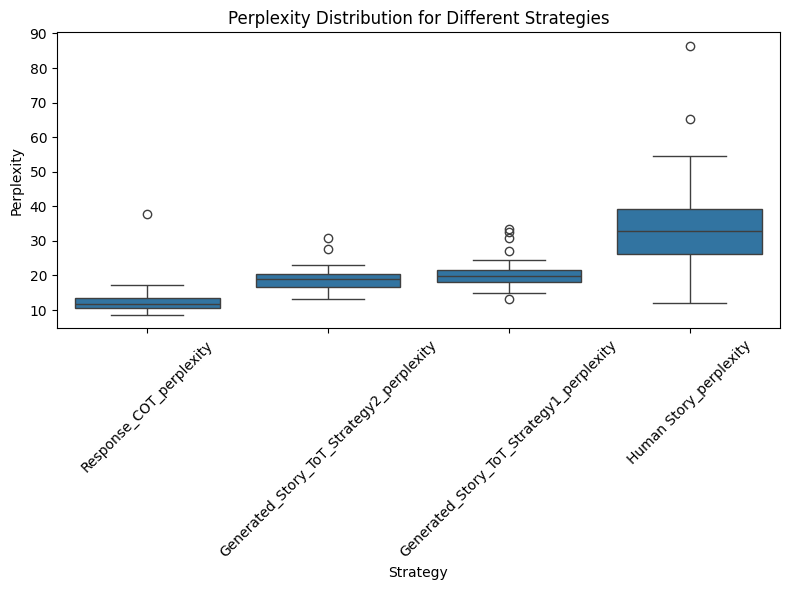

In [ ]:
# Prepare data for box plot (melt the DataFrame)
perplexity_data = pd.melt(
    df,
    value_vars=['Response_COT_perplexity', 'Generated_Story_ToT_Strategy2_perplexity',	'Generated_Story_ToT_Strategy1_perplexity'	, 'Human Story_perplexity',],
    var_name='Strategy',
    value_name='Perplexity'
)

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Strategy', y='Perplexity', data=perplexity_data)
plt.title('Perplexity Distribution for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Perplexity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np

# Function to compute BLEU score with smoothing
def compute_bleu(reference, candidate):
    smoothie = SmoothingFunction().method4  # To handle short sentences
    return sentence_bleu([reference.split()], candidate.split(), smoothing_function=smoothie)

# Function to compute Self-BLEU for a given list of generated stories
def compute_self_bleu(stories):
    n = len(stories)
    bleu_scores = []

    for i in range(n):
        for j in range(i + 1, n):
            bleu_score = compute_bleu(stories[i], stories[j])
            bleu_scores.append(bleu_score)

    return np.mean(bleu_scores)

# Function to compute Self-BLEU for each strategy in the DataFrame
def compute_self_bleu_for_strategies(df):
    self_bleu_scores = []

    for index, row in df.iterrows():
        self_bleu_scores_for_row = {}

        # Loop through the strategies and calculate Self-BLEU
        for strategy in ['Response_COT', 'Generated_Story_ToT_Strategy2', 'Generated_Story_ToT_Strategy1']:
            generated_stories = row[strategy]
            generated_stories_list = generated_stories.split(" | ")  # Assuming stories are separated by " | "

            # Compute Self-BLEU for this strategy
            self_bleu_scores_for_row[strategy] = compute_self_bleu(generated_stories_list)

        self_bleu_scores.append(self_bleu_scores_for_row)

    return self_bleu_scores

# Compute Self-BLEU scores
self_bleu_scores = compute_self_bleu_for_strategies(df)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Initialize a dictionary to hold lists of BLEU scores for each strategy
strategies = ['Response_COT', 'Generated_Story_ToT_Strategy2', 'Generated_Story_ToT_Strategy1']
strategy_scores = {strategy: [] for strategy in strategies}

# Collect scores for each strategy
for score_dict in self_bleu_scores:
    for strategy in strategies:
        strategy_scores[strategy].append(score_dict.get(strategy, 0))

# Calculate the average BLEU score for each strategy using numpy
average_self_bleu_scores = {strategy: np.mean(scores) if len(scores) > 0 else 0
                       for strategy, scores in strategy_scores.items()}

# Print the average BLEU scores for each strategy
print("Average Self-BLEU scores for each strategy:")
for strategy, score in average_bleu_scores.items():
    print(f"{strategy}: {score:.4f}")

Average Self-BLEU scores for each strategy:
Response_COT: 0.0069
Generated_Story_ToT_Strategy2: 0.0062
Generated_Story_ToT_Strategy1: 0.0077


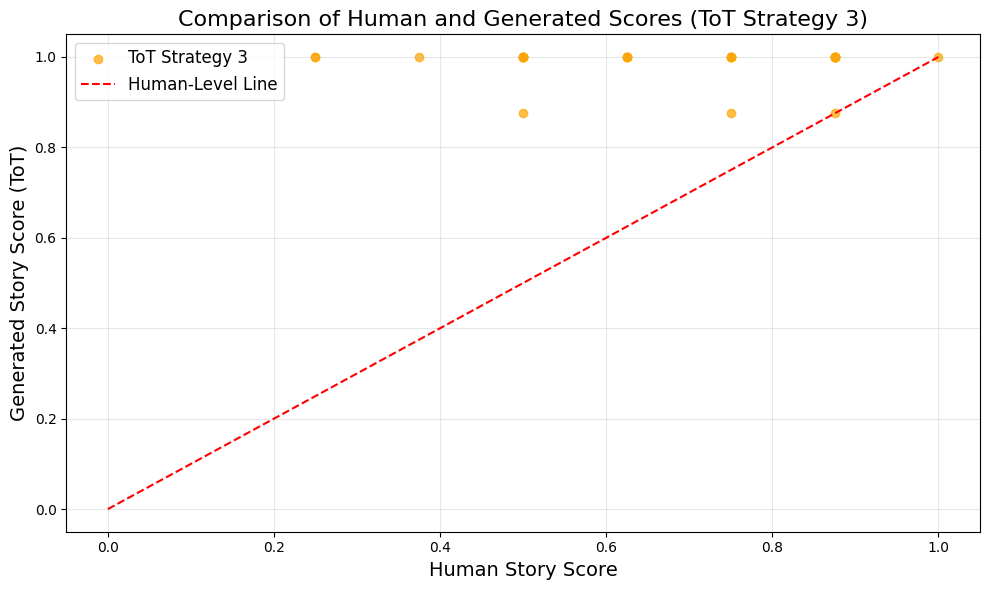

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for ToT_Strategy3
plt.scatter(df['Human Story Score'], df['Generated_Story_Score_ToT_Strategy3'], alpha=0.7, label='ToT Strategy 3', color='orange')

# Line of equality
max_score = max(df['Human Story Score'].max(), df['Generated_Story_Score_ToT_Strategy3'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', label='Human-Level Line')

# Customize plot
plt.title('Comparison of Human and Generated Scores (ToT Strategy 3)', fontsize=16)
plt.xlabel('Human Story Score', fontsize=14)
plt.ylabel('Generated Story Score (ToT)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



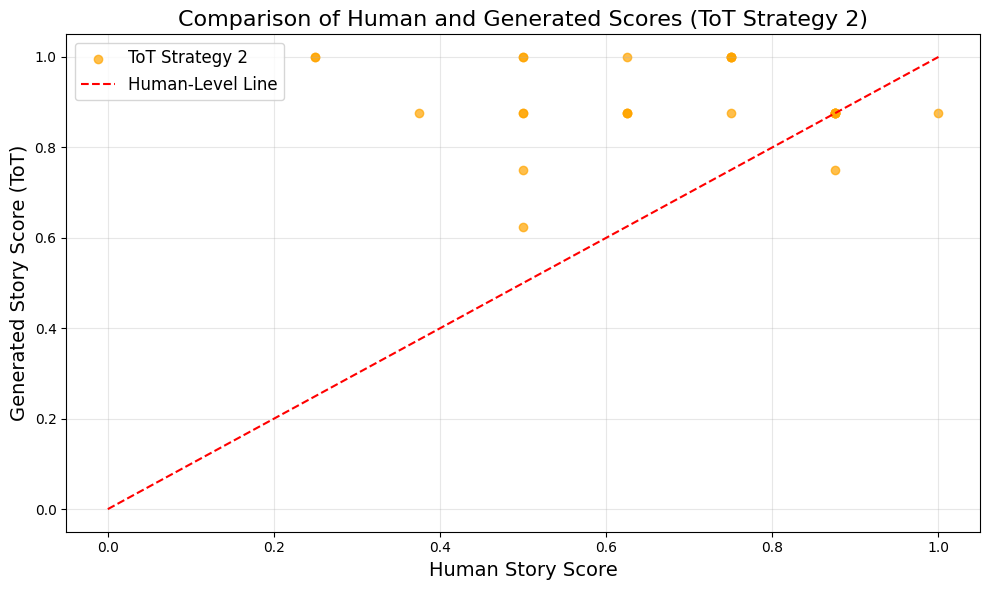

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for ToT_Strategy2
plt.scatter(df['Human Story Score'], df['Generated_Story _Score_ToT_Strategy2'], alpha=0.7, label='ToT Strategy 2', color='orange')

# Line of equality
max_score = max(df['Human Story Score'].max(), df['Generated_Story _Score_ToT_Strategy2'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', label='Human-Level Line')

# Customize plot
plt.title('Comparison of Human and Generated Scores (ToT Strategy 2)', fontsize=16)
plt.xlabel('Human Story Score', fontsize=14)
plt.ylabel('Generated Story Score (ToT)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


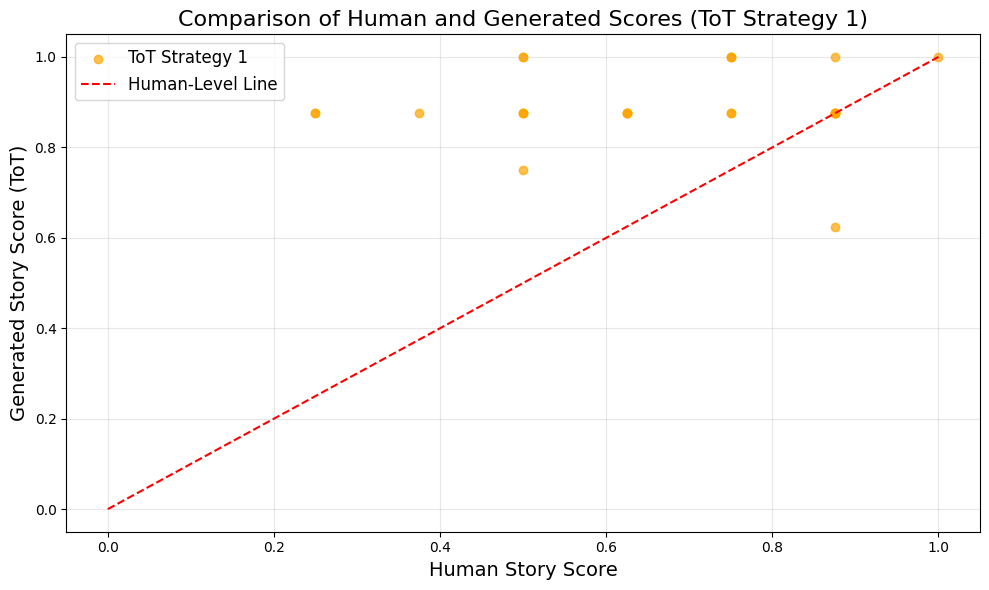

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for ToT_Strategy1
plt.scatter(df['Human Story Score'], df['Generated_Story_Score_ToT_Strategy1'], alpha=0.7, label='ToT Strategy 1', color='orange')

# Line of equality
max_score = max(df['Human Story Score'].max(), df['Generated_Story_Score_ToT_Strategy1'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', label='Human-Level Line')

# Customize plot
plt.title('Comparison of Human and Generated Scores (ToT Strategy 1)', fontsize=16)
plt.xlabel('Human Story Score', fontsize=14)
plt.ylabel('Generated Story Score (ToT)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


# Hypothesis Analysis 2/3

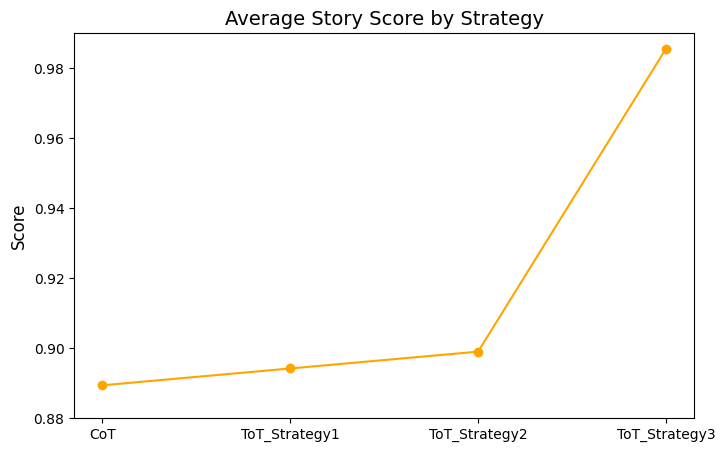

In [ ]:
# Calculate average story scores
strategies = ['CoT', 'ToT_Strategy1', 'ToT_Strategy2', 'ToT_Strategy3']
avg_scores = [
    df['Generated_Story_Score_COT'].mean(),
    df['Generated_Story_Score_ToT_Strategy1'].mean(),
    df['Generated_Story _Score_ToT_Strategy2'].mean(),
    df['Generated_Story_Score_ToT_Strategy3'].mean()
]

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(strategies, avg_scores, marker='o', linestyle='-', color='orange')
plt.ylim(0.88, 0.99)  # Narrow y-axis range
plt.title('Average Story Score by Strategy', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.show()


<ipython-input-11-e54f4b379924>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=latency_data, x='Strategy', y='Latency', palette='Set2')


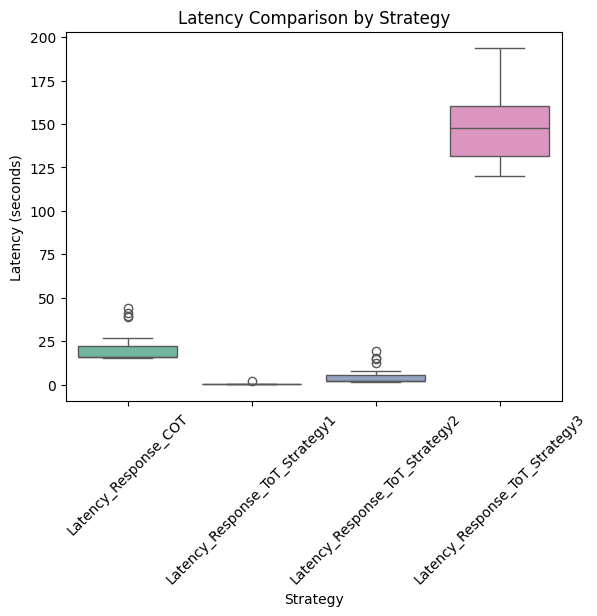

In [ ]:
# Prepare data for latency comparison
latency_data = pd.melt(
    df,
    value_vars=['Latency_Response_COT', 'Latency_Response_ToT_Strategy1', 'Latency_Response_ToT_Strategy2', 'Latency_Response_ToT_Strategy3'],
    var_name='Strategy',
    value_name='Latency'
)

# Create a box plot
sns.boxplot(data=latency_data, x='Strategy', y='Latency', palette='Set2')
plt.title('Latency Comparison by Strategy')
plt.ylabel('Latency (seconds)')
plt.xlabel('Strategy')
plt.xticks(rotation=45)
plt.show()


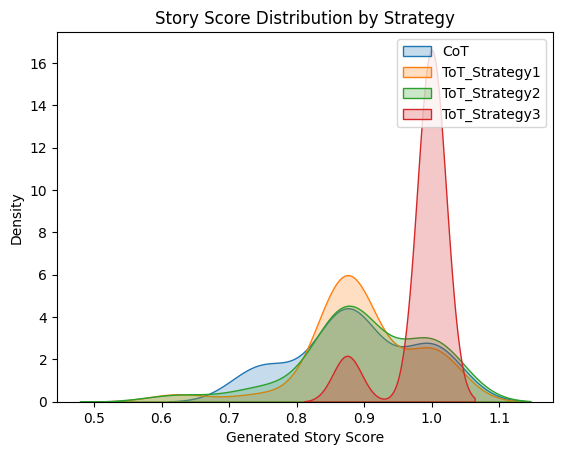

In [ ]:
# Plot distributions for each strategy
sns.kdeplot(df['Generated_Story_Score_COT'], label='CoT', fill=True)
sns.kdeplot(df['Generated_Story_Score_ToT_Strategy1'], label='ToT_Strategy1', fill=True)
sns.kdeplot(df['Generated_Story _Score_ToT_Strategy2'], label='ToT_Strategy2', fill=True)
sns.kdeplot(df['Generated_Story_Score_ToT_Strategy3'], label='ToT_Strategy3', fill=True)

plt.title('Story Score Distribution by Strategy')
plt.xlabel('Generated Story Score')
plt.ylabel('Density')
plt.legend()
plt.show()


Combined Score=(Weight
Latency
​
 ×Normalized Latency)+(Weight
Quality
​
 ×Normalized Story Score)

In [ ]:
# Let's define a function to normalize the values between 0 and 1
def normalize_scores(scores):
    max_score = max(scores)
    min_score = min(scores)
    return [(score - min_score) / (max_score - min_score) for score in scores]

# Function to compute the combined score using weighted sum
def compute_combined_score_for_tot(df, strategies, latency_columns, weight_latency=0.5, weight_quality=0.5):
    combined_scores = {}

    for strategy, latency_col, score_col in zip(strategies, latency_columns, score_columns):
        # Extracting the latency and generated score for each strategy
        latencies = df[latency_col]
        scores = df[score_col]

        # Normalize the latency (invert it, since lower latency is better)
        normalized_latencies = normalize_scores([-latency for latency in latencies])  # Invert latency
        # Normalize the generated story score (higher score is better)
        normalized_scores = normalize_scores(scores)

        # Compute the combined score as a weighted sum
        combined_score = [
            weight_latency * lat + weight_quality * score
            for lat, score in zip(normalized_latencies, normalized_scores)
        ]

        # Storing the combined score in the dictionary
        combined_scores[strategy] = combined_score

    # Adding the combined scores to the dataframe
    for strategy, combined_score in combined_scores.items():
        df[f'Combined_Score_{strategy}'] = combined_score

    return df

# Define the strategy columns and corresponding latency and score columns
strategies = ['ToT_Strategy1', 'ToT_Strategy2', 'ToT_Strategy3']
latency_columns = ['Latency_Response_ToT_Strategy1', 'Latency_Response_ToT_Strategy2', 'Latency_Response_ToT_Strategy3']
score_columns = ['Generated_Story_Score_ToT_Strategy1', 'Generated_Story _Score_ToT_Strategy2', 'Generated_Story_Score_ToT_Strategy3']

# Compute the combined scores
df = compute_combined_score_for_tot(df, strategies, latency_columns)

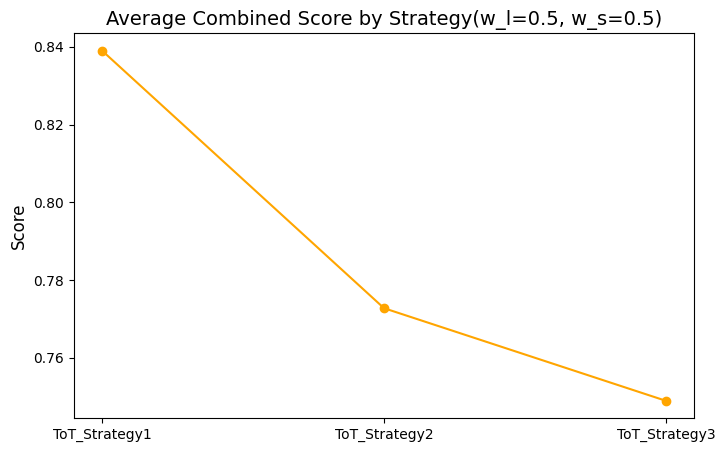

In [ ]:
avg_scores = [
    df['Combined_Score_ToT_Strategy1'].mean(),
    df['Combined_Score_ToT_Strategy2'].mean(),
    df['Combined_Score_ToT_Strategy3'].mean(),
]

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(strategies, avg_scores, marker='o', linestyle='-', color='orange')
plt.title('Average Combined Score by Strategy(w_l=0.5, w_s=0.5)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.show()


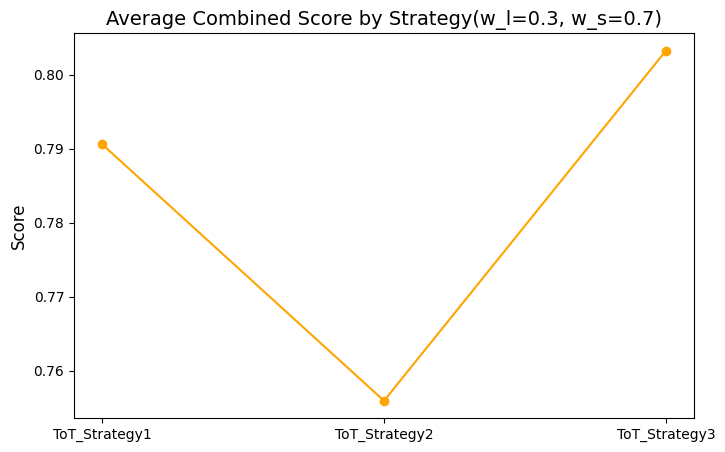

In [ ]:
df = compute_combined_score_for_tot(df, strategies, latency_columns, weight_latency=0.3, weight_quality=0.7)
avg_scores = [
    df['Combined_Score_ToT_Strategy1'].mean(),
    df['Combined_Score_ToT_Strategy2'].mean(),
    df['Combined_Score_ToT_Strategy3'].mean(),
]

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(strategies, avg_scores, marker='o', linestyle='-', color='orange')
plt.title('Average Combined Score by Strategy(w_l=0.3, w_s=0.7)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.show()

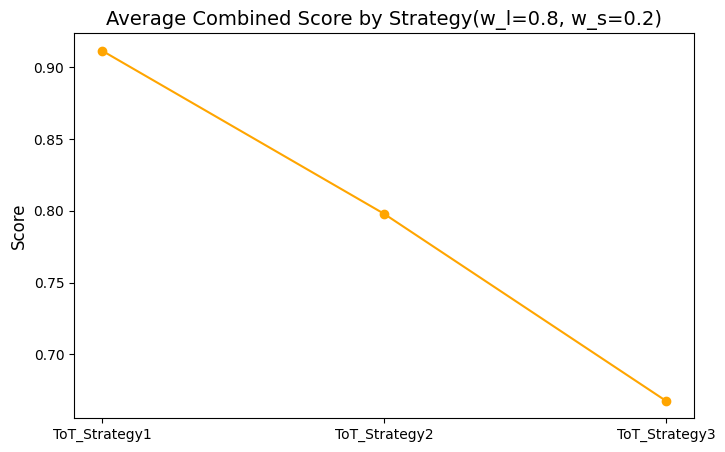

In [ ]:
df = compute_combined_score_for_tot(df, strategies, latency_columns, weight_latency=0.8, weight_quality=0.2)
avg_scores = [
    df['Combined_Score_ToT_Strategy1'].mean(),
    df['Combined_Score_ToT_Strategy2'].mean(),
    df['Combined_Score_ToT_Strategy3'].mean(),
]

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(strategies, avg_scores, marker='o', linestyle='-', color='orange')
plt.title('Average Combined Score by Strategy(w_l=0.8, w_s=0.2)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.show()

In [ ]:
## To compare between CoT, GoT and ToT on the WritingPrompts Dataset

In [79]:
combined_df = pd.read_csv('Comparison_reasoning.csv')
list(combined_df.columns)

['Prompt',
 'Human Story',
 'Response_COT',
 'Latency_Response_COT',
 'Generated_Story_Score_COT',
 'Generated_Story_Score_ToT',
 'Latency_ToT',
 'Generated_Story_Score_GoT',
 'Latency_GoT']

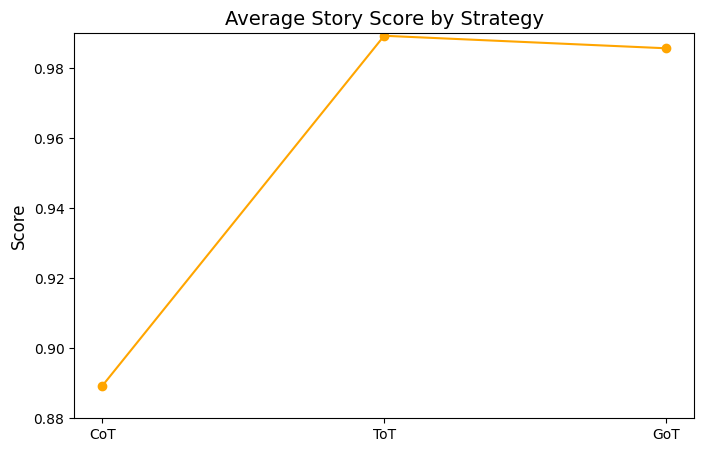

In [81]:
# Calculate average story scores
strategies = ['CoT', 'ToT', 'GoT']
avg_scores = [
    combined_df['Generated_Story_Score_COT'].mean(),
    combined_df['Generated_Story_Score_ToT'].mean(),
    combined_df['Generated_Story_Score_GoT'].mean(),
]

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(strategies, avg_scores, marker='o', linestyle='-', color='orange')
plt.ylim(0.88, 0.99)  # Narrow y-axis range
plt.title('Average Story Score by Strategy', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.show()

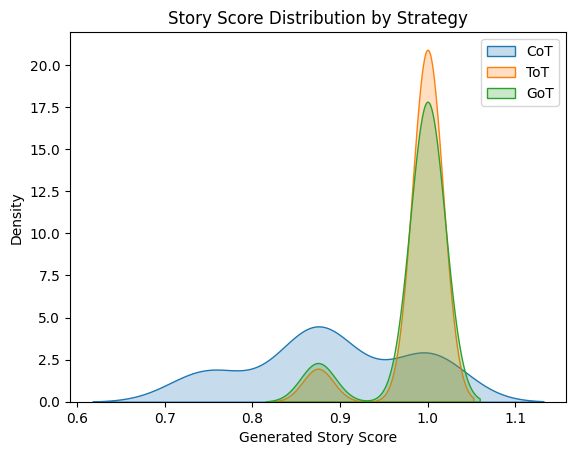

In [83]:
# Plot distributions for each strategy
sns.kdeplot(combined_df['Generated_Story_Score_COT'], label='CoT', fill=True)
sns.kdeplot(combined_df['Generated_Story_Score_ToT'], label='ToT', fill=True)
sns.kdeplot(combined_df['Generated_Story_Score_GoT'], label='GoT', fill=True)

plt.title('Story Score Distribution by Strategy')
plt.xlabel('Generated Story Score')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-85-d391408f87c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=latency_data, x='Strategy', y='Latency', palette='Set2')


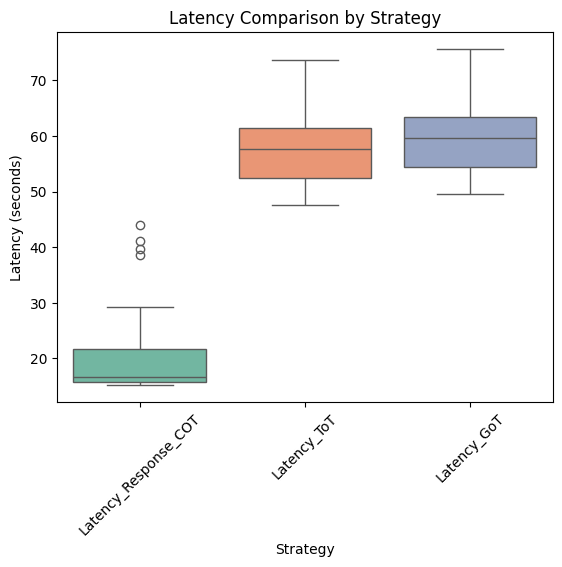

In [85]:
# Prepare data for latency comparison
latency_data = pd.melt(
    combined_df,
    value_vars=['Latency_Response_COT', 'Latency_ToT', 'Latency_GoT'],
    var_name='Strategy',
    value_name='Latency'
)

# Create a box plot
sns.boxplot(data=latency_data, x='Strategy', y='Latency', palette='Set2')
plt.title('Latency Comparison by Strategy')
plt.ylabel('Latency (seconds)')
plt.xlabel('Strategy')
plt.xticks(rotation=45)
plt.show()
